Import the packages


In [2]:
import act
import matplotlib.pyplot as plt

# First import the NetCDF4 package
from netCDF4 import Dataset
from netCDF4 import MFDataset

# Next import plotting functions
from pylab import *

from datetime import date, datetime

Microwave Radiometer (MWR) MP3000A data download from GO-AMAZON project on ARM (ATMOSPHERIC RADIATION MEASUREMENT)

In [ ]:
# Place your username and token here
username = 'LourencoCavalcante' 
token = '311d84bc76093a97' #https://adc.arm.gov/armlive/register

# Download AERIoe data and ceilometer data
act.discovery.download_data(username, token, 'maomwrlosM1.b1', '2014-06-01', '2015-12-30') 

Code to plot ARM NetCDF data

c:\ProgramData\Miniconda3\envs\act_env\Lib\site-packages\act\utils\data_utils.py:199: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(diff).mode[0]
c:\ProgramData\Miniconda3\envs\act_env\Lib\site-packages\act\utils\data_utils.py:199: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or

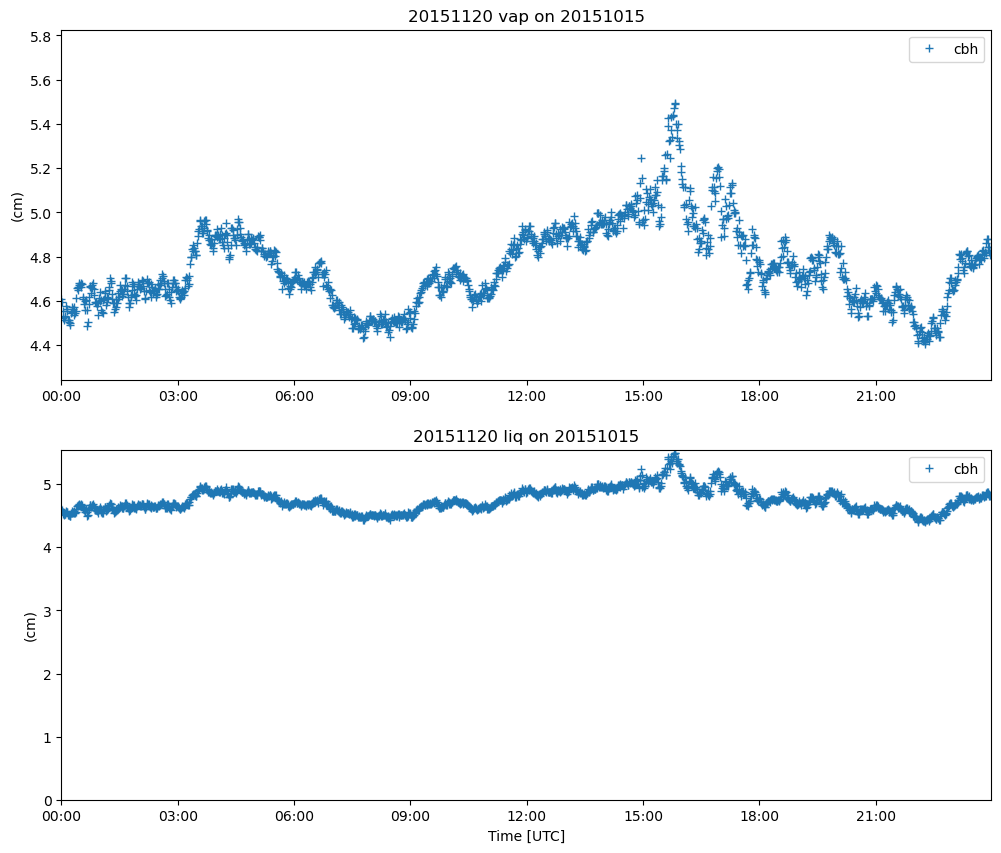

In [11]:
data = datetime.today()
hoje = data.strftime('%d-%m-%Y')
hora = data.strftime('%H-%M-%S')
nome = 'maomwrlosM1.b1'


aerioe_ds = act.io.armfiles.read_netcdf('maomwrlosM1.b1/maomwrlosM1.b1.20151010*.cdf')
ceil_ds = act.io.armfiles.read_netcdf('maomwrlosM1.b1/maomwrlosM1.b1.20151015*.cdf')


# Create a TimeSeriesDisplay object

aerioe_ds = aerioe_ds.resample(time='1min').nearest()
ceil_ds = ceil_ds.resample(time='1min').nearest()

display = act.plotting.TimeSeriesDisplay(
   {'20151119': aerioe_ds, '20151120': ceil_ds},
   subplot_shape=(2,), figsize=(12,10)
)

# Plot data
display.plot('vap', dsname='20151119', marker='+', markeredgewidth=1,
   linewidth=0, subplot_index=(0,), label='cbh')
display.plot('vap', dsname='20151120', cmap='act_HomeyerRainbow', set_shading='nearest',
   add_nan=True, subplot_index=(0,))

display.plot('vap', dsname='20151119', marker='+', markeredgewidth=1,
   linewidth=0, subplot_index=(1,), label='cbh')
display.plot('liq', dsname='20151120', cmap='act_HomeyerRainbow', set_shading='nearest',
   add_nan=True, subplot_index=(1,))
plt.savefig(f'maomwrlosM1.b1/output/figures/{hoje}_{hora}_{nome}.png')

In [ ]:

# Load the NetCDF file into a data object
#data = MFDataset('/home/maou/Área de Trabalho/Victor/Estágio/Dados de Satelite/*.09.2015 Antartica.nc', mode='r') **#Aqui eu gostaria de colocar outros 29 dados e não sei como.**

#nc_file = Dataset('maomwrlosM1.b1.20151117.000031.cdf','r',format='NETCDF4_CLASSIC')
nc_file = MFDataset('L:/GitHub/CAP-Dissertation-Complementary-studies/Notebooks/maomwrlosM1.b1/maomwrlosM1.b1.*.cdf','r')
#print(nc_file.variables)
# Load the time and temperature as data objects

temp_obj = nc_file.variables['sky31']
time_obj = nc_file.variables['time']
# Load the time and temperature data into the workspace

temperature = temp_obj[:]
time = time_obj[:]
# Convert the time from seconds since midnight GMT to hours since midnight GMT
time_hour = time/3600
# Now plot the data
# Setup the plot

display = plot(figsize=(15, 10))

# Plot temperature data in top plot


plot(time_hour, temperature)
# Limit the axes ranges
xlim(0,24)
# You can also force the ticks to be at 6-hour intervals (for example)
xticks([0,6,12,18,24])
# Add axes labels and a title
xlabel(nc_file.variables['time'].long_name )
ylabel(nc_file.variables['tbsky23'].long_name)
title(nc_file.variables['time'].units)
# Output as a PNG format file
savefig('testplot.png', format='png')
# When plotting from within a script you have to instruct the script to display the output
show()

#print(nc_file.variables['tbsky23'].long_name)

In [1]:

# Read in AERIoe and ceilometer data
aerioe_ds = act.io.armfiles.read_netcdf('sgpaerioe1turnC1.c1/sgpaerioe1turnC1.c1.20220211.000354.nc')
ceil_ds = act.io.armfiles.read_netcdf('sgpceilC1.b1/sgpceilC1.b1.20220211.000005.nc')

# There isn't information content from the AERI above 3 km
# Remove data with a height above 3 km
aerioe_ds = aerioe_ds.sel(height=aerioe_ds.coords['height'] <= 3)

# Convert Ceilometer cloud base height to km
ceil_ds['first_cbh'] = ceil_ds['first_cbh']/1000

# Remove first_cbh if it is higher than 3 km
ceil_ds['first_cbh'] = ceil_ds['first_cbh'][~(ceil_ds['first_cbh'] > 3)]

# Create a TimeSeriesDisplay object
display = act.plotting.TimeSeriesDisplay(
   {'AERIoe': aerioe_ds, 'Ceilometer': ceil_ds},
   subplot_shape=(2,), figsize=(15,10)
)

# Plot data
display.plot('first_cbh', dsname='Ceilometer', marker='+', color='black', markeredgewidth=3,
   linewidth=0, subplot_index=(0,), label='cbh')
display.plot('temperature', dsname='AERIoe', cmap='viridis', set_shading='nearest',
   add_nan=True, subplot_index=(0,))

display.plot('first_cbh', dsname='Ceilometer', marker='+', color='black', markeredgewidth=3,
   linewidth=0, subplot_index=(1,), label='cbh')
display.plot('waterVapor', dsname='AERIoe', cmap='act_HomeyerRainbow', set_shading='nearest',
   add_nan=True, subplot_index=(1,))

plt.savefig('sgpaerioe1turnC1.c1.20220211.png')

NameError: name 'act' is not defined